# Project Proposal - Heart Disease Prediction

Name: Sheldon Yoon

NetID: ssy38

RUID: 215008323

## Objective: Create a predictive model and visualize risk factors for heart disease based on historical patient data. What risk factors in terms of demographics, health conditions can we detect to anticipate heart disease?

### Why is this important?

* This is important because heart disease is the leading cause of death worldwide. However, with the power of data science and machine learning, we can create models to predict heart disease and identify risk factors like age, sex, health conditions, blood information, etc. so that we can use preventive care to minimize the effects of heart disease. I am not the first to do this, because one of the most promising uses of technology is for medicine purposes and is a field that will continue to be researched.

### Changes from project proposal

* I will only be using one of the datasets rather than both like proposed. There is already some overlap between the two and the dataset I am using already has 12 attributes, 11 of them being health features and the last one being the dependent variable (heart disease). I feel that this is enough information to go off of for the project

* I will also not be implementing a database. The dataset is simple and relatively small enough and does not require the features of a database. I did the lab instead.

### Dataset

* UCI Machine Learning contains raw patient data and heart disease data

  * https://archive.ics.uci.edu/dataset/45/heart+disease

* Kaggle contains user-cleaned and compiled dataset from these from UCI Machine Learning which is the dataset I will be working off of.

  * https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data contains cleaned UCI data which makes working with the data much easier

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### 1. Import data from heart.csv

#### Dataset is from [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

In [2]:
!kaggle datasets download fedesoriano/heart-failure-prediction
with zipfile.ZipFile("heart-failure-prediction.zip","r") as zip_ref:
    zip_ref.extractall("heart-failure-prediction")

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0%|                                               | 0.00/8.56k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.56k/8.56k [00:00<00:00, 17.8MB/s]


In [3]:
df = pd.read_csv("heart-failure-prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


* Get structure of dataset before we start working

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 2. Make sure data is clean before we start analyzing it

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


In [9]:
col_cat = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]
for col in col_cat:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print('\n')

Unique values in Sex:
Sex
M    725
F    193
Name: count, dtype: int64


Unique values in ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


Unique values in FastingBS:
FastingBS
0    704
1    214
Name: count, dtype: int64


Unique values in RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


Unique values in ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


Unique values in ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64




In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* There are outliers for Cholesterol and RestingBP, with values of 0 which is not possible.

In [11]:
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


* This row is the only person missing RestingBP and is also missing Cholesterol, so it should not affect our dataset too much if we remove them.

In [12]:
df = df[df['RestingBP'] != 0]
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


* There are a lot of missing Cholesterol values so we will impute the value with the median.

In [13]:
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())
df['Cholesterol'].describe()

count    917.000000
mean     240.600872
std       54.009298
min       85.000000
25%      214.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

### 3. Visualize dataset

#### Explanation of variables
Source: https://archive.ics.uci.edu/dataset/45/heart+disease

* Categorical variables

  * `Sex`

    * `M`: male

    * `F`: female

  * `ChestPainType`

    * `ATA`: atypical angina (chest pain that doesn't follow typical pattern)

    * `NAP`: non-anginal pain (pain not related to heart)

    * `ASY`: asymptomatic (no pain)

    * `TA`: typical angina (chest pain typically related to heart issues)

  * `FastingBS` (fasting blood sugar)

    * `0`: normal (below 120 mg/dl)

    * `1`: abnormal (above 120mg/dl)

  * `RestingECG` (electrocardiogram results)

    * `Normal`

    * `ST`: ST-T wave abnormality (changes in segments of ECG waves)

    * `LVH`: left ventricular hypertrophy (enlargement of heart's left ventricle)

  * `ExerciseAngina` (chest pain during exercise)

    * `Y`: yes
    
    * `N`: no

  * `ST_Slope` (slope of ST segment in ECG)

    * `Up`: up-sloping ST segment (generally normal)

    * `Flat`: flat ST segment (potential indicator of heart disease)

    * `Down`: down-sloping ST segment (potential indicator of heart disease)

  * `HeartDisease`

    * `0`: no heart disease

    * `1`: heart disease

* Numerical variables

  * `Age`

    * Represents the age of the patient in years.

  * `RestingBP`

    * Resting Blood Pressure, measured in mm Hg (millimeters of mercury).

    * Indicates the blood pressure of the patient while at rest. High blood pressure can be a risk factor for heart disease.

  * `Cholesterol`

    * Total cholesterol level in mg/dL (milligrams per deciliter).

    * Abnormal cholesterol levels (high or low) can be indicative of heart health issues.

  * `MaxHR`

    * Maximum heart rate achieved during exercise, measured in beats per minute (bpm).

    * Lower maximum heart rate values can indicate heart disease, while higher maximum heart rate can indicate physical fitness.

  * `Oldpeak`

    * ECG ST depression induced by exercise relative to rest, measured in mm.

    * Higher values might suggest underlying cardiac problems or reduced blood flow.

- From this information alone, we might want to look at correlations between demographics (age, sex) and the other variables.

- We should also look at how each of these variables correlate with heart disease prevalence.

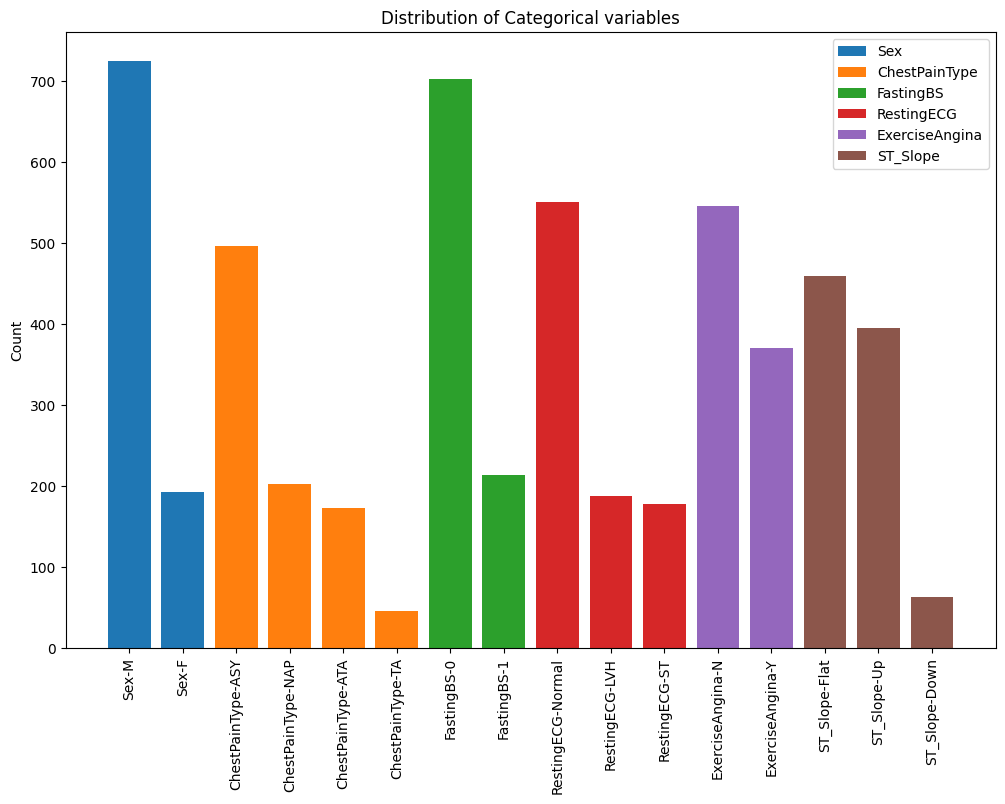

In [14]:
# Distribution of categorical variables
counts = {col: df[col].value_counts() for col in col_cat}
plt.figure(figsize=(12, 8))
for i, (col, count) in enumerate(counts.items(), 1):
    plt.bar([f"{col}-{index}" for index in count.index], count.values, label=col)
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Distribution of Categorical variables")
plt.legend()
plt.show()

* This dataset seems to be dominated by males. For chest pain, fasting blood sugar, resting ecg, and exercise angina, the majority of patients seem to be normal. However, many patients seem to have a flat st slope which is an indicator of heart disease.

#### Visualize numerical variables vs heart disease using box plots

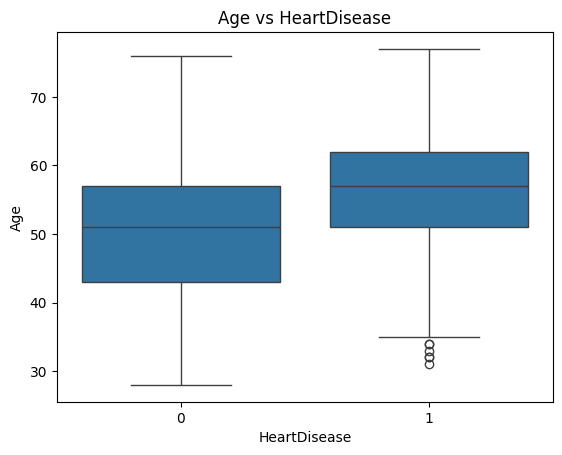

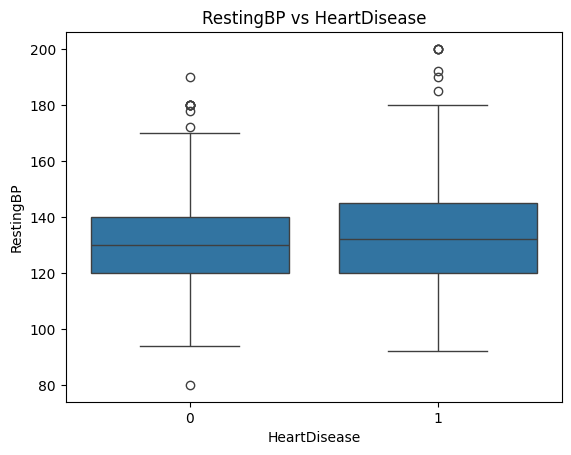

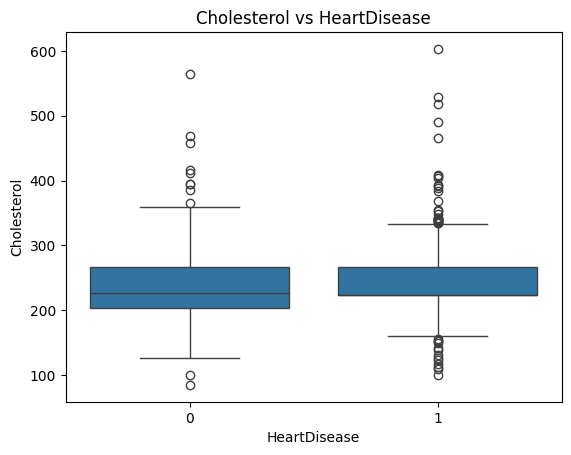

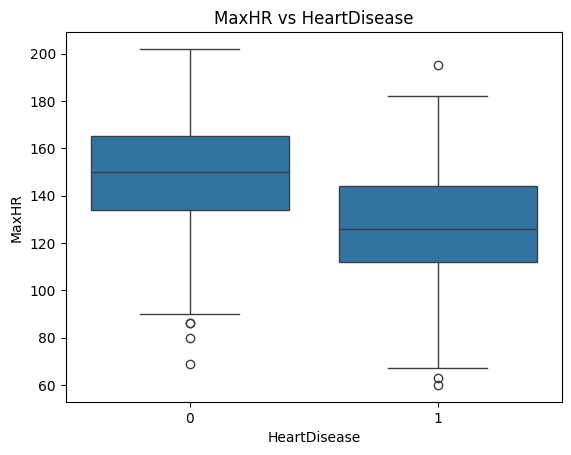

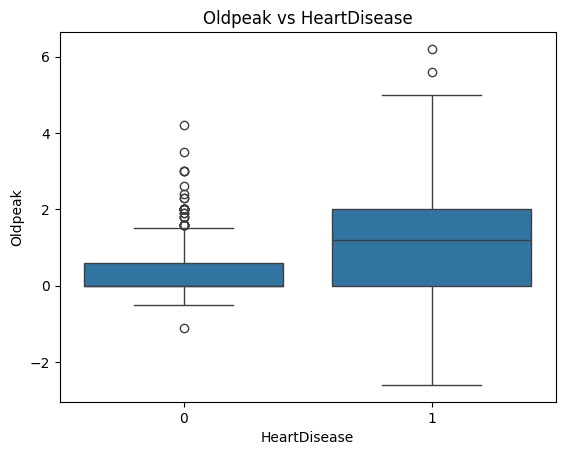

In [15]:
col_num = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for i, column in enumerate(col_num, 1):
    sns.boxplot(x='HeartDisease', y=column, data=df)
    plt.title(f'{column} vs HeartDisease')
    plt.show()



In [16]:
for col in col_num:
    print(f'{col} vs HeartDisease')
    print(df.groupby('HeartDisease')[col].describe())
    print('\n')

Age vs HeartDisease
              count       mean       std   min   25%   50%   75%   max
HeartDisease                                                          
0             410.0  50.551220  9.444915  28.0  43.0  51.0  57.0  76.0
1             507.0  55.901381  8.735583  31.0  51.0  57.0  62.0  77.0


RestingBP vs HeartDisease
              count        mean        std   min    25%    50%    75%    max
HeartDisease                                                                
0             410.0  130.180488  16.499585  80.0  120.0  130.0  140.0  190.0
1             507.0  134.449704  18.928797  92.0  120.0  132.0  145.0  200.0


Cholesterol vs HeartDisease
              count        mean        std    min    25%    50%     75%    max
HeartDisease                                                                  
0             410.0  238.000000  54.130197   85.0  204.0  227.0  266.75  564.0
1             507.0  242.704142  53.872885  100.0  223.0  223.0  267.00  603.0


MaxHR vs Hea

##### For these boxplots and their respective statistics, we can make several analyses:

* Age:

  * The age graph for those with heart disease is shifted right compared to those without heart disease.

  * The mean and median are both higher in those with heart disease than those without.

  * High positive correlation

* RestingBP:

  * The resting blood pressure of those with heart disease is slightly higher across the range, with slightly higher min, quartiles, and max.

  * Example: median of those with heart disease is 132 compared to 130

  * Low positive correlation

* Cholesterol:

  * The cholesterol levels of those with heart disease is higher in the lower and upper ranges of the dataset than those without.

    * We imputed a lot of these values so the range of values will be much closer to the median.

  * The median cholesterol level of those with heart disease (223) is slightly lower than the median of those without heart disease (227) yet the mean is higher and the min and max are higher. The distribution data for those with heart disease is skewed right.

  * Moderate positive correlation

* MaxHR:

  * The max heart rate of those with heart disease is visibly and consistently lower than those without

  * The median max heart rate of those with heart disease is 24 lower and the mean is 21 lower. This trend is seen across the entire dataset

  * High negative correlation

* OldPeak:

  * The distribution of values of those with heart disease is much more spread out than those without heart disease.

  * The standard deviation of those with heart disease (1.15) is much greater than those without (0.70).

  * The mean and median are also higher for those with heart disease compared to those without.

  * Moderate positive correlation on high values and low negative correlation on low values

##### Conclusion: all the numerical variables have some correlation with heart disease, with some being very strong predictors of heart disease.

#### Visualizing categorical variables vs heart disease using count plot

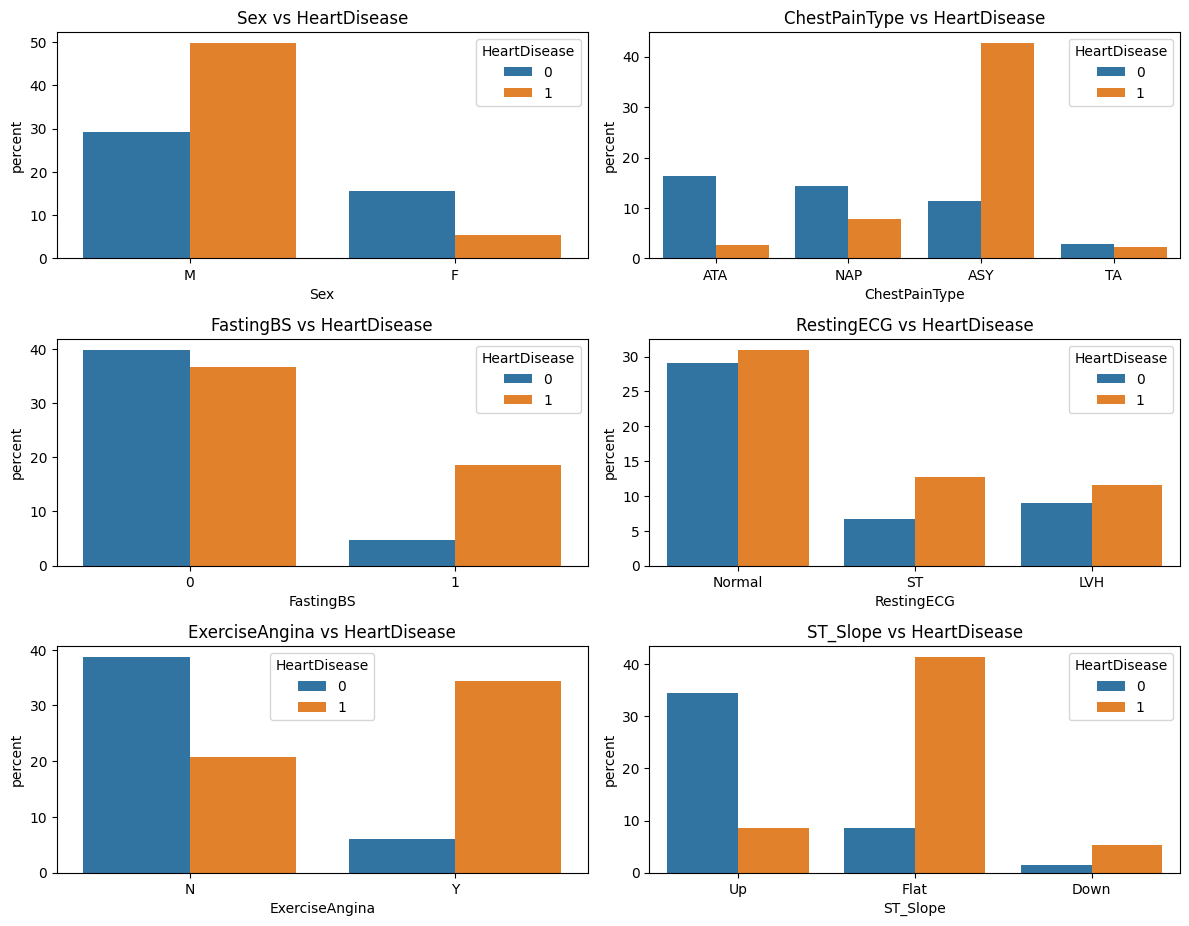

In [17]:
plt.figure(figsize=(12, 12))

# Plotting categorical columns with HeartDisease
for i, column in enumerate(col_cat, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, hue='HeartDisease', data=df, stat='percent')
    plt.title(f'{column} vs HeartDisease')
    plt.tight_layout()

plt.show()

In [18]:
# Calculate proportions within each category
for column in col_cat:
    print(f"Proportions of HeartDisease in each category of {column}:")
    crosstab = pd.crosstab(df[column], df['HeartDisease'], margins=True, margins_name="Total")
    crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    print(crosstab_percent)
    print("\n")

Proportions of HeartDisease in each category of Sex:
HeartDisease          0          1  Total
Sex                                      
F             37.046632  12.953368   50.0
M             18.439227  31.560773   50.0
Total         22.355507  27.644493   50.0


Proportions of HeartDisease in each category of ChestPainType:
HeartDisease           0          1  Total
ChestPainType                             
ASY            10.483871  39.516129   50.0
ATA            43.063584   6.936416   50.0
NAP            32.425743  17.574257   50.0
TA             28.260870  21.739130   50.0
Total          22.355507  27.644493   50.0


Proportions of HeartDisease in each category of FastingBS:
HeartDisease          0          1  Total
FastingBS                                
0             26.031294  23.968706   50.0
1             10.280374  39.719626   50.0
Total         22.355507  27.644493   50.0


Proportions of HeartDisease in each category of RestingECG:
HeartDisease          0          1  To

##### Analysis of categorical variables

* Sex:

  * Males are much more likely to have heart disease (32%) compared to females (13%).

* ChestPainType:

  * Patients with any type of chest pain (ATA, NAP, TA) are less likely to have heart disease.

  * Interestingly, patients without any chest pain (ASY) are almost four times as likely to have heart disease (40%) than not (10%). Additionally, 79% of patients with heart disease have no heart pain.

* FastingBS:

  * Having normal fasting blood sugar is not very indicative of heart disease.

  * Having elevated fasting blood sugar is very indicative of heart disease

* Resting ECG:

  * Again, normal ECG is not very indicative of heart disease but any abnormal ECG is slightly more likely to result in heart disease.

* Exercise Angina:

  * Having angina during exercise is a very strong indicator of heart disease, with 43% of people who have angina and heart disease as compared to 17% of people without angina having heart disease

* ST Slope

  * Up-sloping ST (normal) is highly correlated with no heart disease, while flat and down-sloping ST is very highly correlated with heart disease.

##### Conclusion: All the categorical variables are predictors of heart disease in some way. Some categorical variables are much better predicting of heart disease than others.

##### Some more visualization of the numerical variables using histogram and line

* Reinforces previous conclusions we made about numerical variables

  * Age is shifted right for heart disease compared to those without

  * Resting BP is skewed to the right for heart disease compared to those without

  * Cholesterol is also skewed to the right for heart disease but slightly compared to those without

  * Max heart rate is significantly shifted right for heart disease compared to those without

  * Old peak is mostly skewed right for heart disease but has greater variance leading to more extreme minimum values, compared to those without

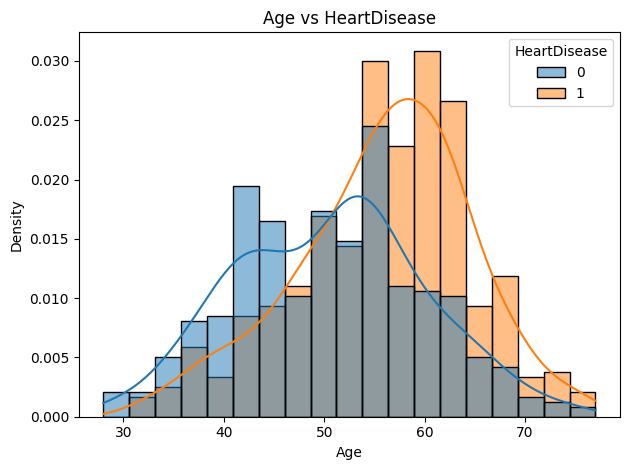

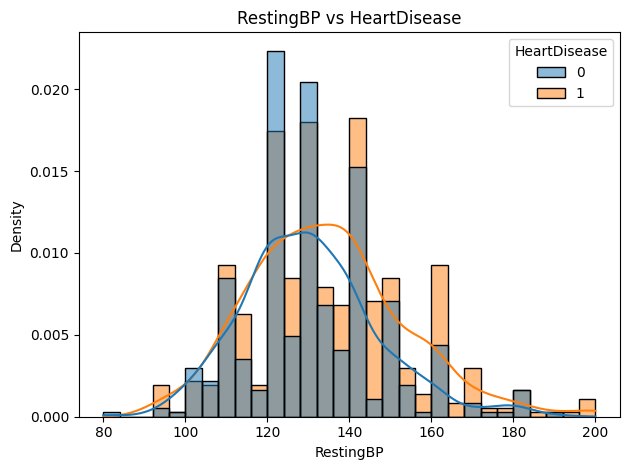

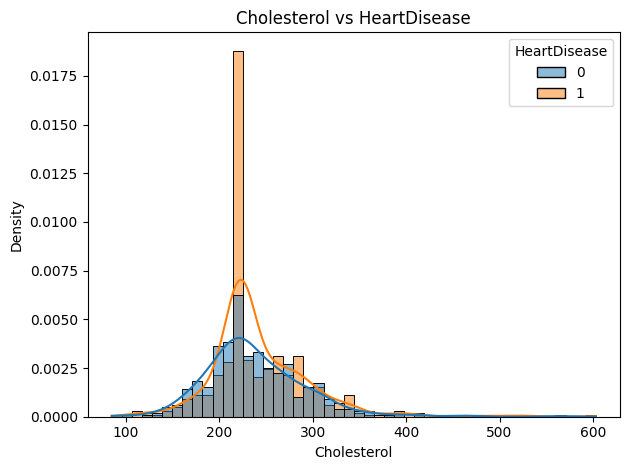

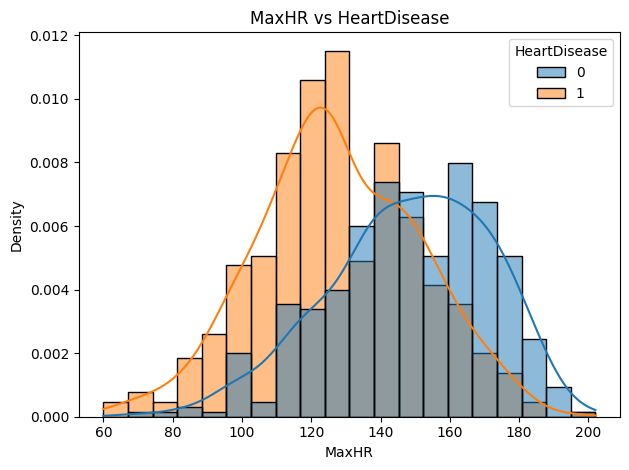

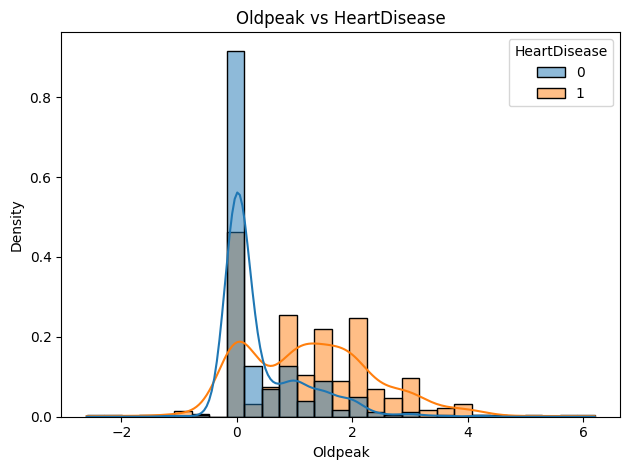

In [19]:
# Plotting numerical columns with HeartDisease using histograms
for i, column in enumerate(col_num, len(col_cat) + 1):
    sns.histplot(data=df, x=column, hue='HeartDisease', kde=True, multiple='layer' , stat='density')
    plt.title(f'{column} vs HeartDisease')
    plt.tight_layout()
    plt.show()

### 4. Creating a predictive model for heart disease

In [20]:
# Prepare data
df_encoded = pd.get_dummies(df, columns=col_cat, dtype='int', drop_first=True)

#### We will use a logistic regression model because our dependent variable is discrete

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.92      0.87      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



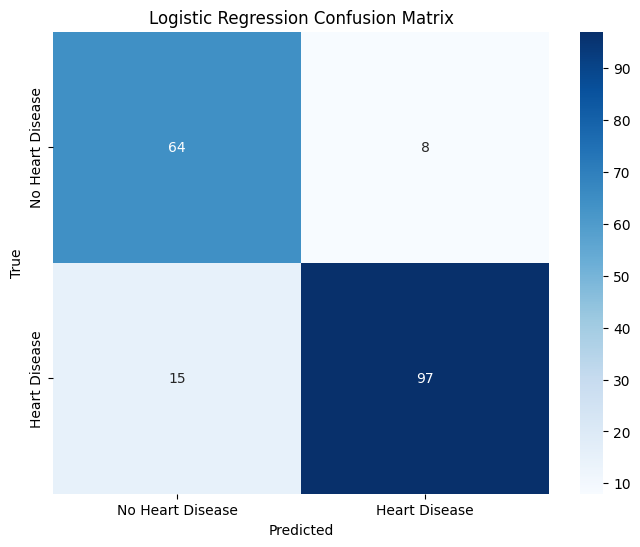

In [21]:
# Define variables
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Results
print("Logistic Regression Classification Report:\n" + classification_report(y_test, y_pred_log))
cm_log = confusion_matrix(y_test, y_pred_log)

# Plot classification matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Results of logistic regression

* Logistic regression model has high precision and recall which means the model can correctly predict and identify heart disease cases respectively.

    * The model correctly predicted no heart disease 81% of the time and correctly identified no heart disease 89% of the time.

    * The model correctly predicted heart disease 92% of the time and correctly identified heart disease 87% of the time.

* The model works slightly better for predicting heart disease than predicting no heart disease, with an f1_score of 0.89 vs 0.85 respectively.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        72
           1       0.91      0.91      0.91       112

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



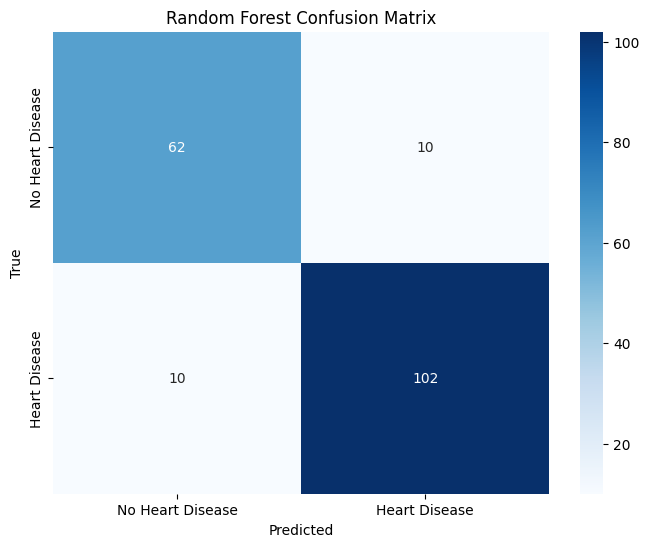

In [22]:
# Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Results
print("Random Forest Classification Report:\n" + classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot classification matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

#### Results of random forest

* The random forest model had even greater success than the logistic regression model.

    * The model correctly predicted no heart disease 86% of the time and correctly identified no heart disease 86% of the time.

    * The model correctly predicted heart disease 91% of the time and correctly identified heart disease 91% of the time.

* Again, the model performs better predicting heart disease as compared to predicting no heart disease.

### Using the Random Forest model, we will identify the greatest risk factors for heart disease

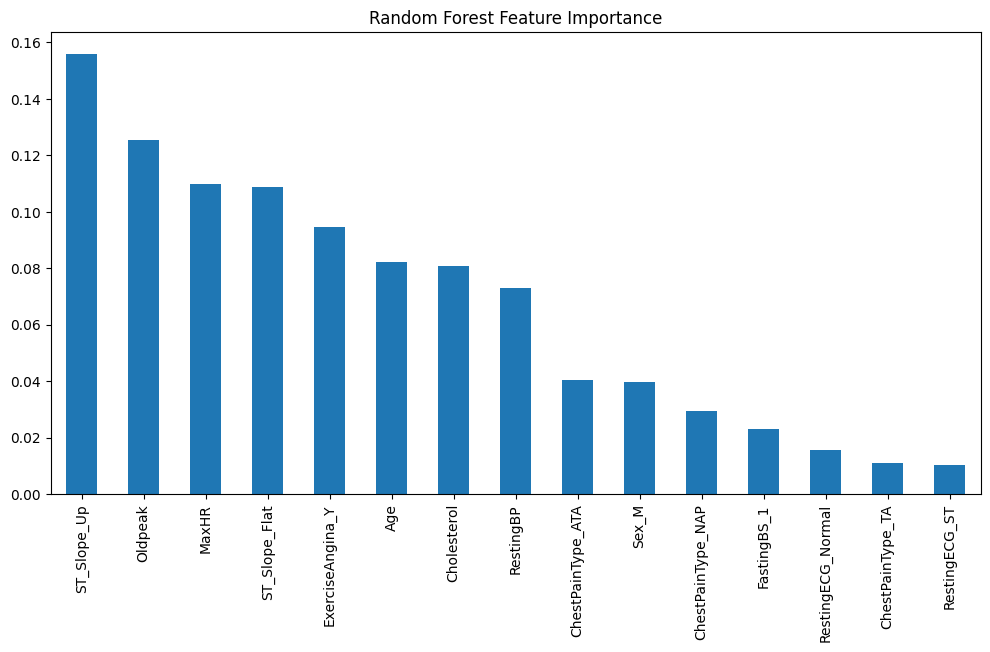

Top Risk Factors for Heart Disease:
ST_Slope_Up          0.155878
Oldpeak              0.125577
MaxHR                0.109860
ST_Slope_Flat        0.108732
ExerciseAngina_Y     0.094666
Age                  0.082255
Cholesterol          0.080939
RestingBP            0.072965
ChestPainType_ATA    0.040452
Sex_M                0.039695
dtype: float64


In [23]:
# Random Forest model Feature Importance
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.show()

# Identify greatest risk factors
risk_factors = feature_importance.head(10)
print("Top Risk Factors for Heart Disease:")
print(risk_factors)

##### Using our data visualization analysis as well as the feature importance analysis, we can identify the top 3 following risk factors:

* Existance of ST slope up is the greatest risk factor for heart disease according to our model

* Old peak is the second greatest risk factor, and extreme values will increase your risk of heart disease

* Having a low max heart rate is the third greatest risk factor for heart disease.

* Existance of ST slope flat is the fourth greatest risk factor

* Having angina during exercise is the fifth greatest risk factor.

### Conclusion

* After analyzing the dataset, knowing your health status on these conditions will help predict heart disease and allow you to make lifestyle changes and receive medical advice to minimize the effects of heart disease.

* Many of these can be done at home, like measuring maximum heart rate, blood pressure, or identifying chest pain. However, some of these require going to the doctor or s pecialized, like measuring cholesterol or taking an ECG, which is why good medical infrastructure is important in reducing what is worldwide human's greatest killer today.

* More research has and will continue to be done on more efficient ways to predict heart disease as well as preventing and mitigating heart disease.